In [7]:
# Load the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Plot styling
import seaborn as sns
sns.set() # for plot styling
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Read the csv file
dataset = pd.read_csv('CLV.csv')

# Explore the dataset
dataset.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


In [8]:
len(dataset)

303

In [9]:
# descriptive statistics of the dataset
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
INCOME,303.0,245.273927,48.499412,126.0,211.0,240.0,274.0,417.0
SPEND,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0


G:\Apps\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\Apps\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Income / Spend')

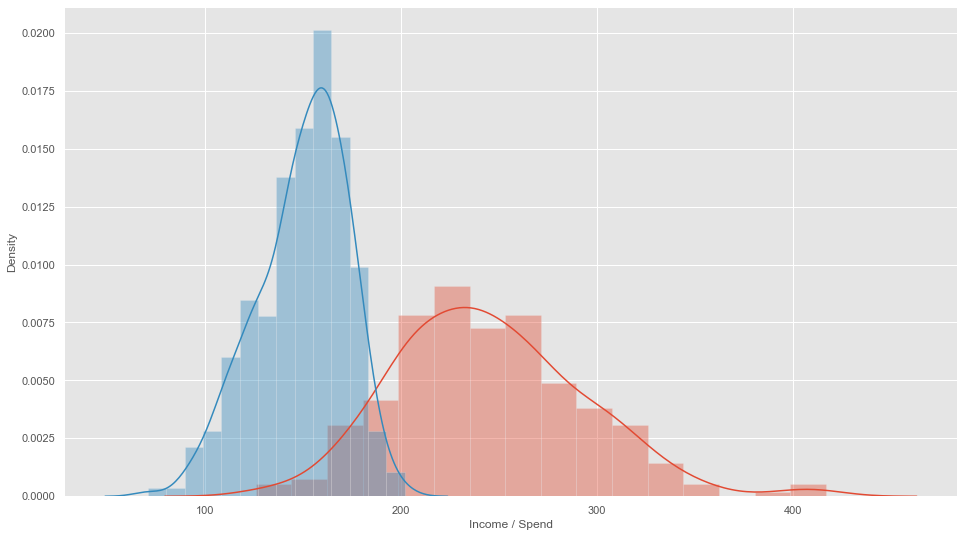

In [21]:
# Visualizing the data - displot
# Distribution plot of Income & Spend
plot_income = sns.distplot(dataset['INCOME'])
plot_spend = sns.distplot(dataset['SPEND'])
plt.xlabel('Income / Spend')

[(0.0, 420.0)]

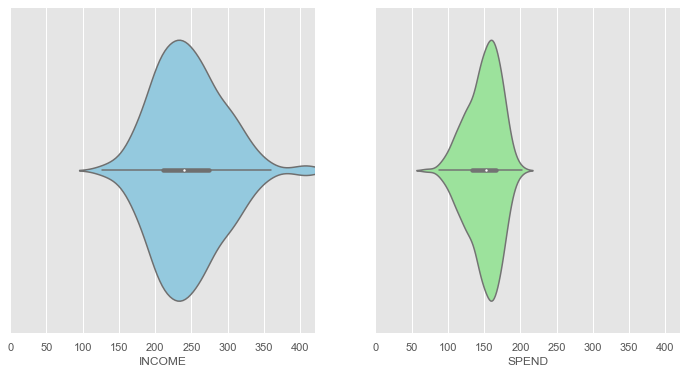

In [29]:
# Violin plot of Income and Spend
f, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
v1 = sns.violinplot(data=dataset, x='INCOME', color='skyblue', ax=axes[0])
v2 = sns.violinplot(data=dataset, x='SPEND', color='lightgreen', ax=axes[1])
v1.set(xlim=(0, 420))

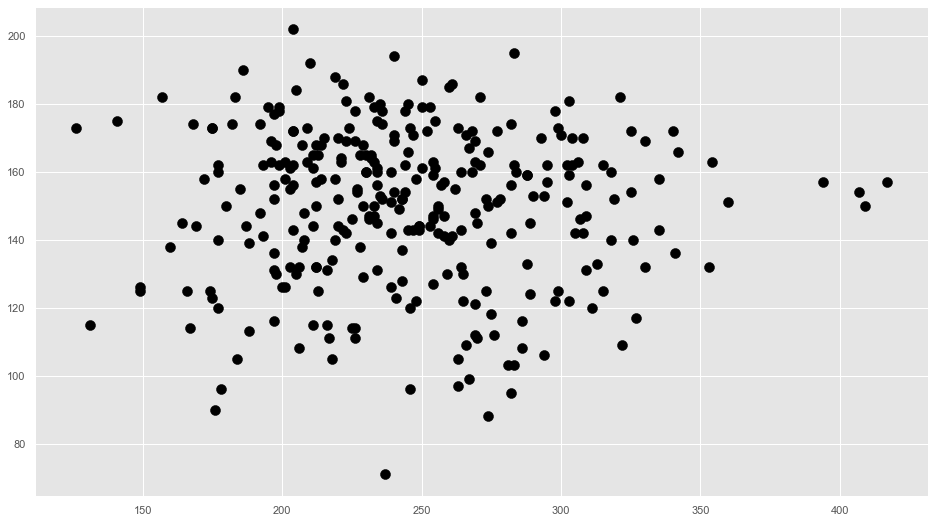

In [36]:
# Plotting the values to understand the spread
Income = dataset['INCOME'].values
Spend = dataset['SPEND'].values
X = np.array(list(zip(Income, Spend)))
plt.scatter(Income, Spend, c='black', s=100)

C:\Users\Admin\AppData\Local\Temp/ipykernel_4620/85797798.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


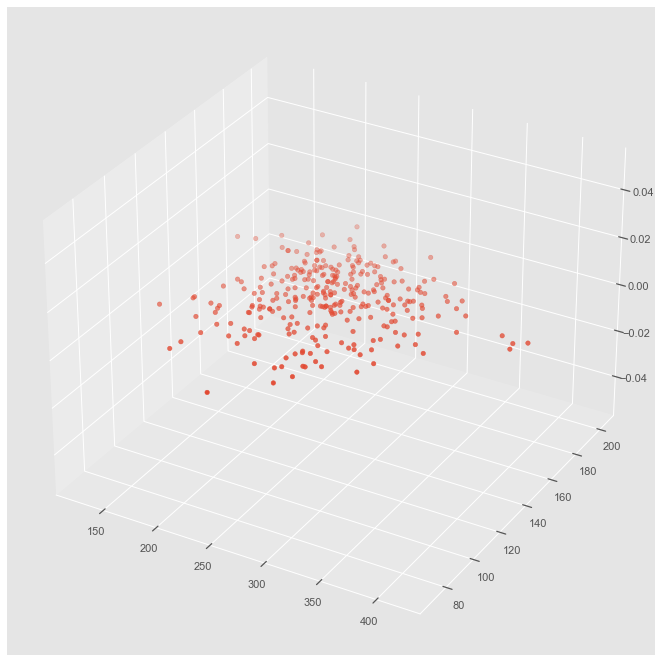

In [40]:
# plot in 3D space
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
fig.add_axes(ax) 
ax.scatter(X[:, 0], X[:, 1])
# X[:,0] is accessing everything in the first column, 
# X[:,1] is accessing everything in the second column.

In [41]:
X = dataset.iloc[:, [0, 1]].values

G:\Apps\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


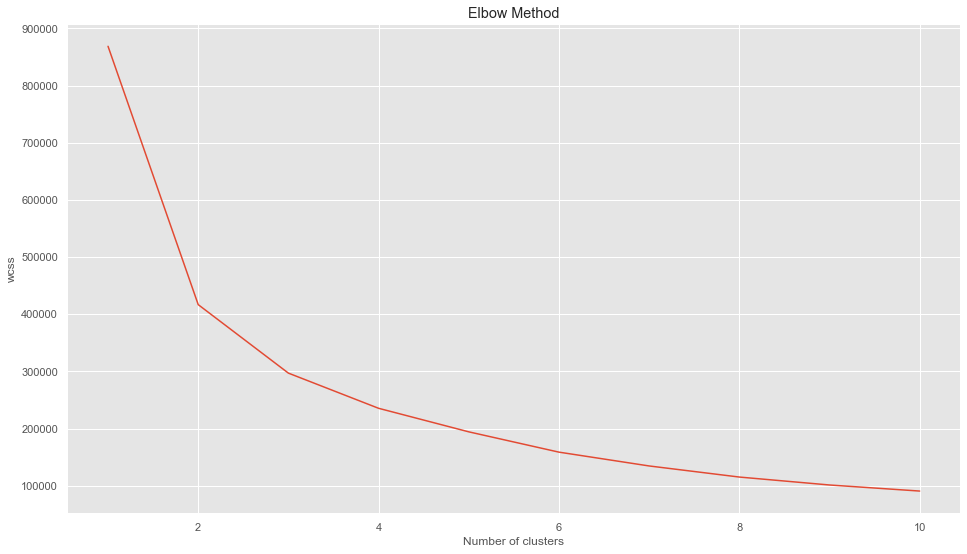

In [42]:
# Using the elbow method to find the optimum number of clusters
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of square 
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++',
                max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

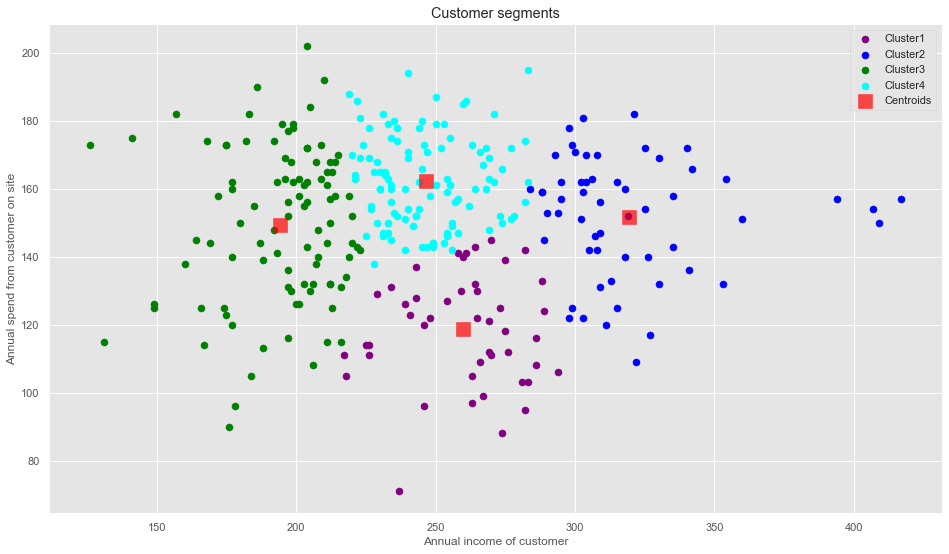

In [46]:
# Fitting the k-means to the dataset with k=4
km4 = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10,
            random_state=0)
y_means = km4.fit_predict(X)

# Visualizing the clusters for k=4
plt.scatter(X[y_means==0, 0], X[y_means==0, 1], s=50,
           c='purple', label='Cluster1')
plt.scatter(X[y_means==1, 0], X[y_means==1, 1], s=50,
           c='blue', label='Cluster2')
plt.scatter(X[y_means==2, 0], X[y_means==2, 1], s=50,
           c='green', label='Cluster3')
plt.scatter(X[y_means==3, 0], X[y_means==3, 1], s=50,
           c='cyan', label='Cluster4')

plt.scatter(km4.cluster_centers_[:, 0],
           km4.cluster_centers_[:, 1], s=200, marker='s', c='red', alpha=0.7,
           label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()

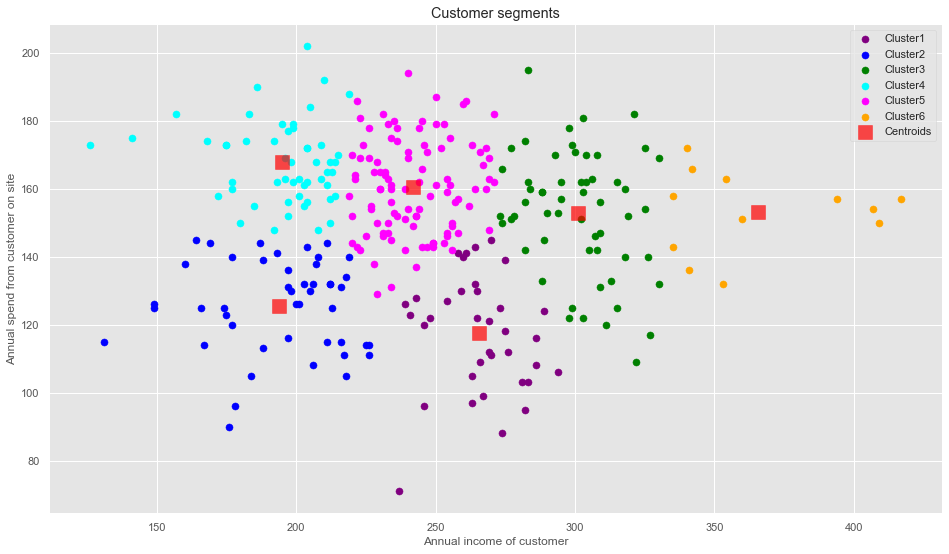

In [48]:
# Fitting the k-means to the dataset with k=6
km4 = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10,
            random_state=0)
y_means = km4.fit_predict(X)

# Visualizing the clusters for k=6
plt.scatter(X[y_means==0, 0], X[y_means==0, 1], s=50,
           c='purple', label='Cluster1')
plt.scatter(X[y_means==1, 0], X[y_means==1, 1], s=50,
           c='blue', label='Cluster2')
plt.scatter(X[y_means==2, 0], X[y_means==2, 1], s=50,
           c='green', label='Cluster3')
plt.scatter(X[y_means==3, 0], X[y_means==3, 1], s=50,
           c='cyan', label='Cluster4')
plt.scatter(X[y_means==4, 0], X[y_means==4, 1], s=50,
           c='magenta', label='Cluster5')
plt.scatter(X[y_means==5, 0], X[y_means==5, 1], s=50,
           c='orange', label='Cluster6')

plt.scatter(km4.cluster_centers_[:, 0],
           km4.cluster_centers_[:, 1], s=200, marker='s', c='red', alpha=0.7,
           label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()

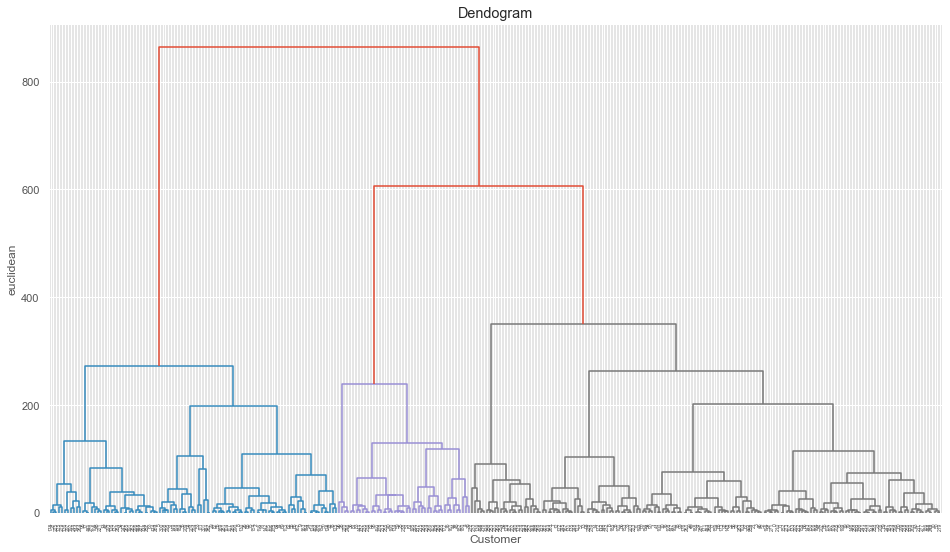

In [49]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dend = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendogram')
plt.xlabel('Customer')
plt.ylabel('euclidean')
plt.show()

In [57]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

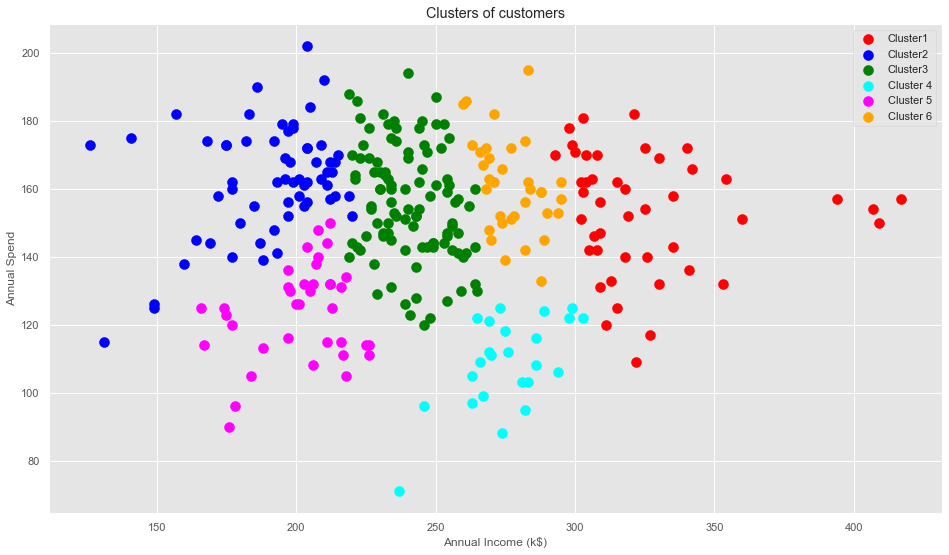

In [58]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[y_hc == 5, 0], X[y_hc == 5, 1], s = 100, c = 'orange', label = 'Cluster 6')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Annual Spend')
plt.legend()
plt.show()